In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_input = "../data/Full Spring 2025.xlsx"

In [7]:
df = pd.read_excel(file_input)

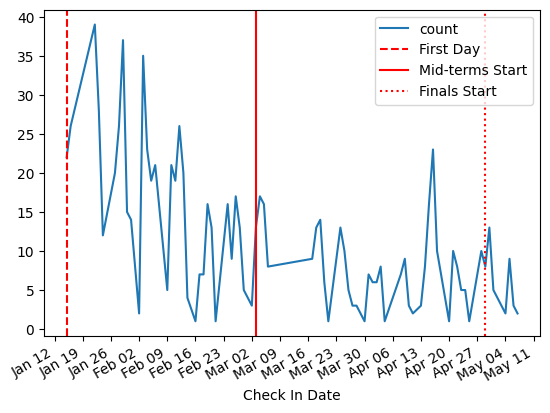

In [8]:
plt.figure()
first_vist = df.sort_values("Check In Date").drop_duplicates("NetID", keep="first")

ax = first_vist["Check In Date"].value_counts().sort_index().plot()
#marks the x axis labels as every sunday
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))  # 6 = Sunday
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
#first day,:Jan 15th
#middle (end 8 weeks) march3/march4t (start seccond 8 weeks)
#firnals start: April 29th
first_day = "2025-01-15"
mid_terms = "2025-03-03"
finals_start = "2025-04-29"
plt.axvline(pd.to_datetime(first_day), color="red", linestyle="--", label="First Day")
plt.axvline(pd.to_datetime(mid_terms), color="red", linestyle="solid", label="Mid-terms Start")
plt.axvline(pd.to_datetime(finals_start), color="red", linestyle="dotted", label="Finals Start")

plt.legend()
plt.show()

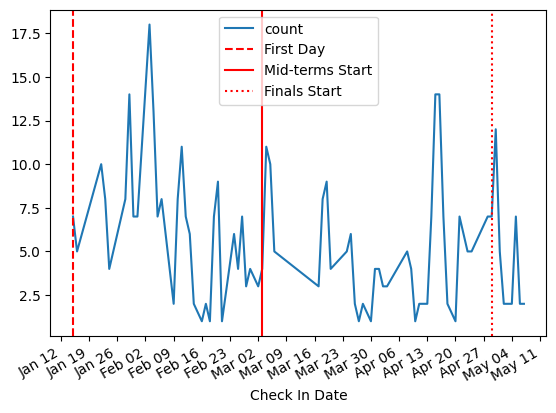

In [9]:
#second image is people that only came once visit
plt.figure()
all_students = df["NetID"]
student_counts = all_students.value_counts()
one_time_visitors = student_counts[student_counts==1]
one_time_visitors = one_time_visitors.keys()
one_time_visits = df[df["NetID"].isin(one_time_visitors)]
ax = one_time_visits["Check In Date"].value_counts().sort_index().plot()
#marks the x axis labels as every sunday
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))  # 6 = Sunday
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.axvline(pd.to_datetime(first_day), color="red", linestyle="--", label="First Day")
plt.axvline(pd.to_datetime(mid_terms), color="red", linestyle="solid", label="Mid-terms Start")
plt.axvline(pd.to_datetime(finals_start), color="red", linestyle="dotted", label="Finals Start")
plt.legend()
plt.show()

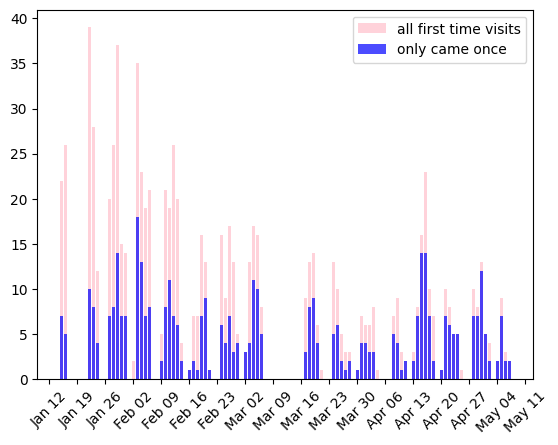

In [10]:
plt.figure()

df["Check In Date"] = pd.to_datetime(df["Check In Date"])

# full daily range
all_days = pd.date_range(df["Check In Date"].min(), df["Check In Date"].max(), freq="D")

# counts (reindex to include every day)
first_counts = first_vist["Check In Date"].value_counts().sort_index()
first_counts = first_counts.reindex(all_days, fill_value=0)

once_counts  = one_time_visits["Check In Date"].value_counts().sort_index()
once_counts  = once_counts.reindex(all_days, fill_value=0)

# convert dates to matplotlib numeric format so axis is a real date axis
x = mdates.date2num(all_days)

ax = plt.gca()

#offset, side by side
width = 0.8  # in days
# ax.bar(x - width/4, first_counts.values, width=width/2, label="all first time visits", color="pink")
# ax.bar(x + width/4, once_counts.values,  width=width/2, label="only came once",         color="blue")
#on top of eachother
ax.bar(x, first_counts.values, width=width, label="all first time visits", color="pink", alpha=0.7)
ax.bar(x, once_counts.values,  width=width, label="only came once",         color="blue", alpha=0.7)

# tell axis it's dates and format ticks: show only Sundays
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.xticks(rotation=45)
plt.legend()
plt.show()